In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\CSV files\BreastCancer.csv")

In [3]:
print(data.head())
print(data.info())
print(data.describe())

if 'id' in data.columns:
    data = data.drop(columns=['id'])

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

print(data.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

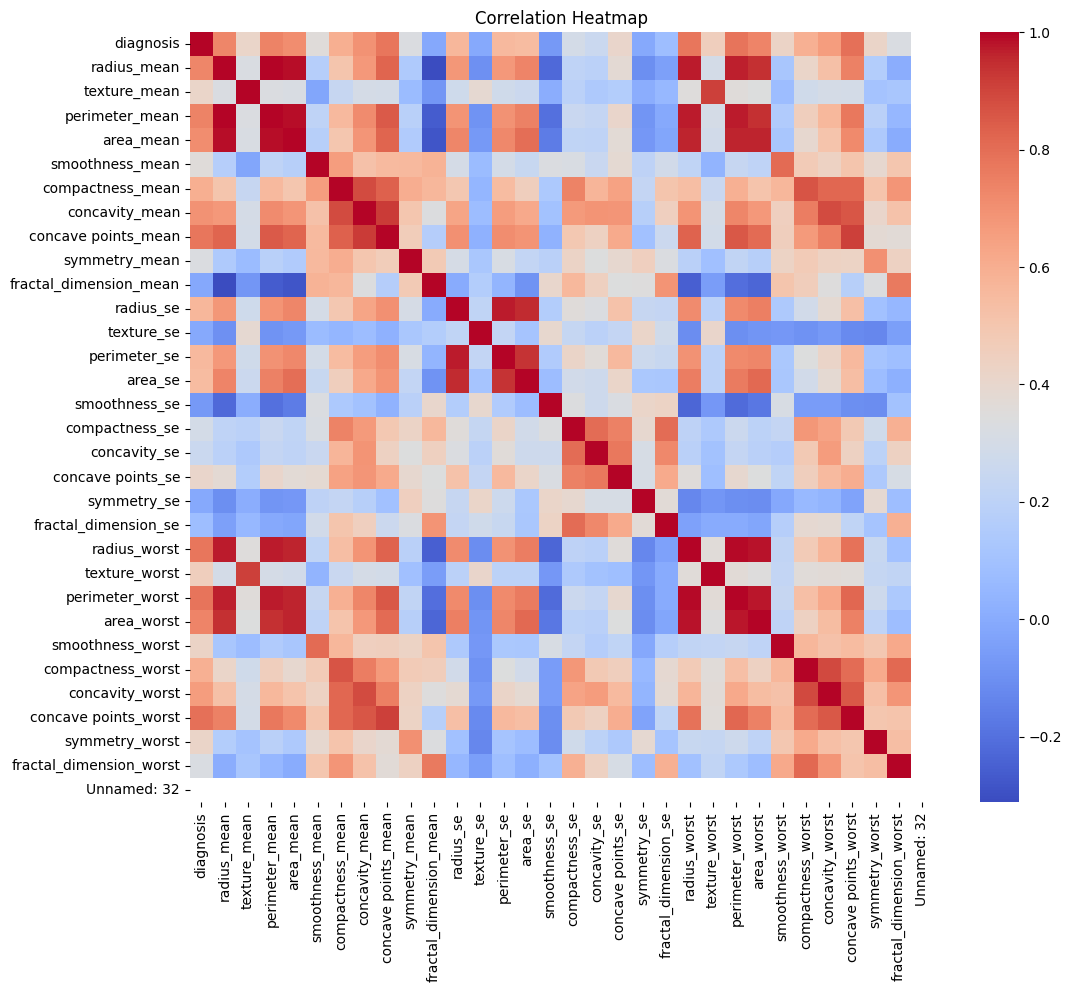

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

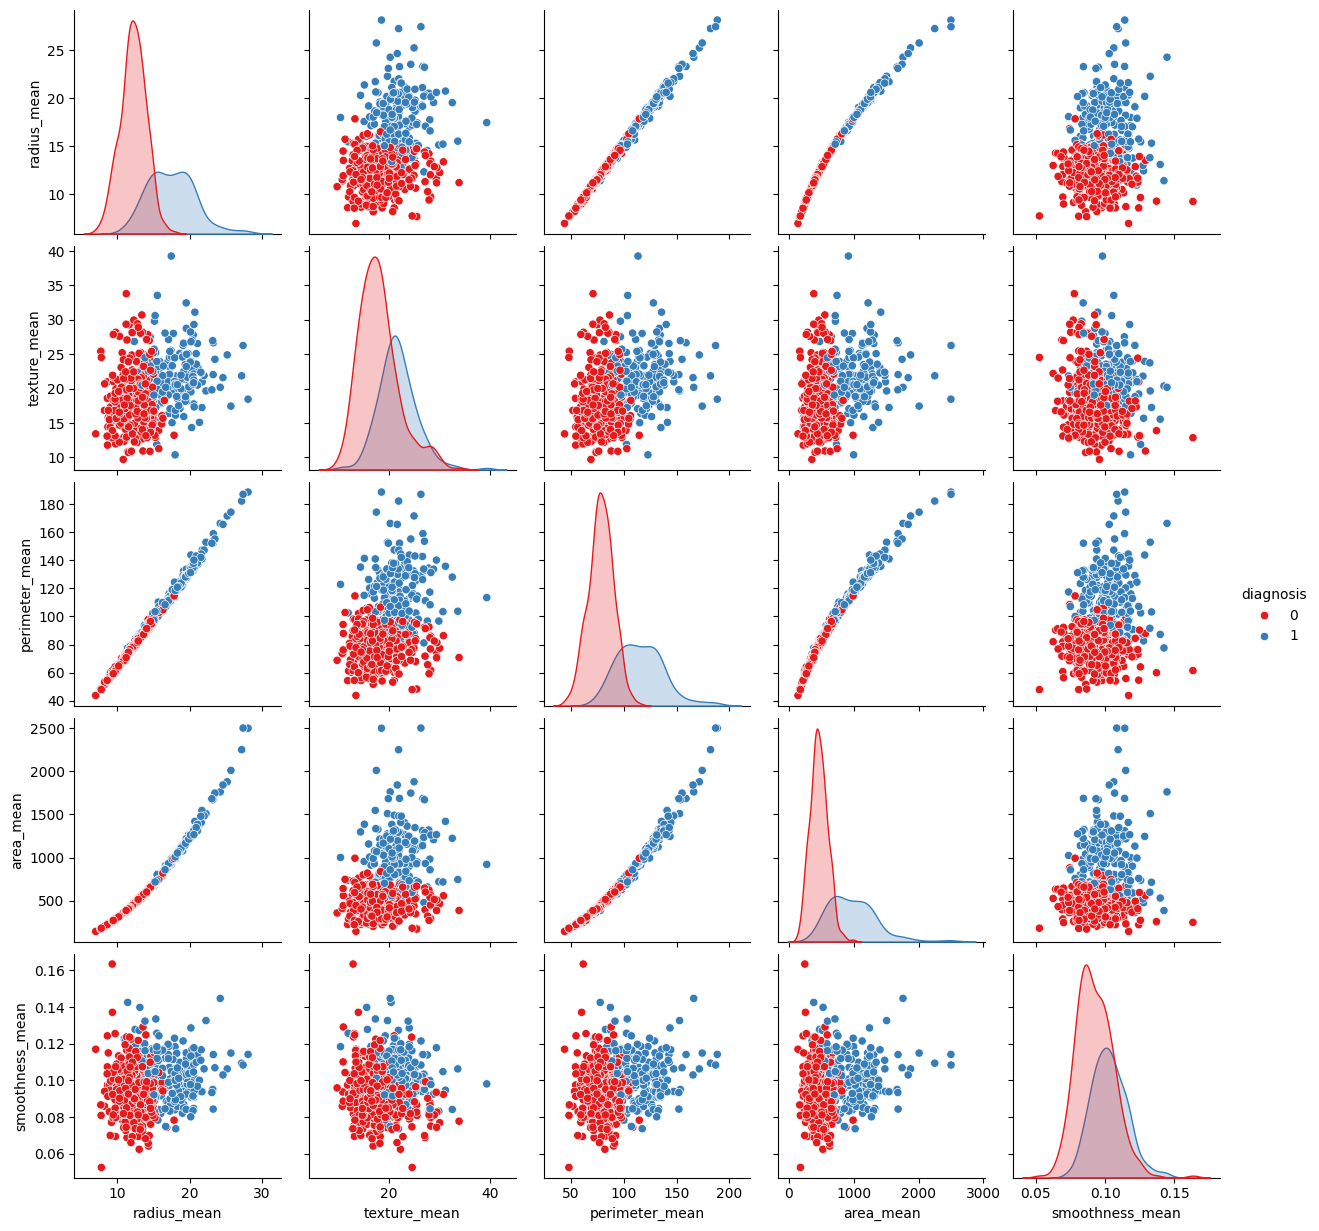

In [5]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis', palette='Set1')
plt.show()

In [6]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')  

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


c:\Users\ASUS\PYTHON\myenv\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ASUS\PYTHON\myenv\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_pred))

rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
fpr, tpr, _ = roc_curve(y_test, rf_probs)

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



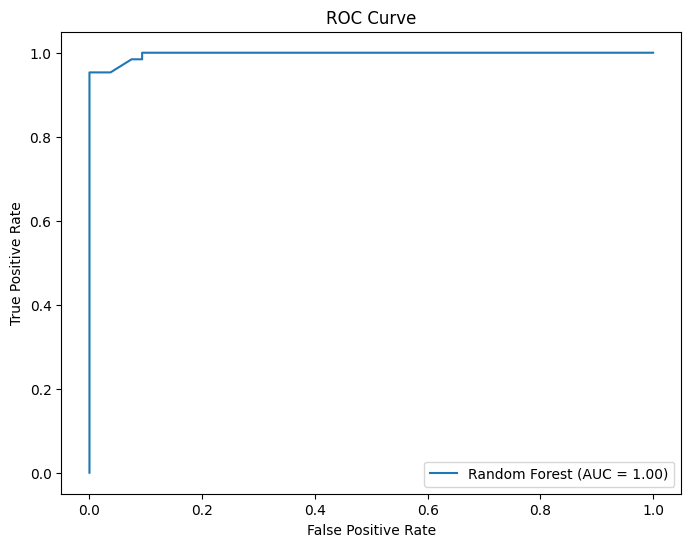

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [9]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01]}
svc = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='f1')
svc.fit(X_train, y_train)
svc_best = svc.best_estimator_
svc_pred = svc_best.predict(X_test)


In [10]:
# SVM Evaluation
print("SVM Classifier Report:")
print(classification_report(y_test, svc_pred))

svc_probs = svc_best.predict_proba(X_test)[:, 1]
svc_auc = roc_auc_score(y_test, svc_probs)
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)

plt.figure(figsize=(8, 6))

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

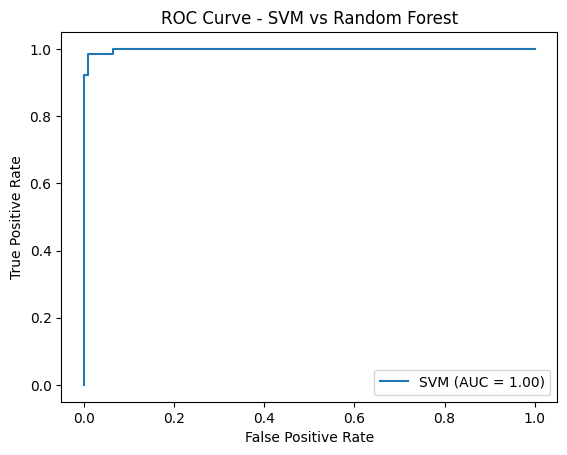

In [11]:
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {svc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM vs Random Forest")
plt.legend()
plt.show()
